In [51]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Copy of airline_passenger_satisfaction (1).csv')
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047,Male,Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,Customer,34.0,Business travel,Business,526.0,3.0,3.0,3.0,...,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23.0,Business travel,Business,646.0,4.0,4.0,4.0,...,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,satisfied
129877,37675,Female,Loyal Customer,17.0,Personal Travel,Eco,828.0,2.0,5.0,1.0,...,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14.0,Business travel,Business,1127.0,3.0,3.0,3.0,...,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0,satisfied


In [52]:
from sklearn.preprocessing import LabelEncoder

import numpy as np

categorical_cols = df.select_dtypes(exclude=[np.number]).columns.values.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.values.tolist()

encoder = LabelEncoder()

for c in categorical_cols:
  df[c] = encoder.fit_transform(df[c])

missing_values_count = df.isnull().sum()
missing_values = 100 * missing_values_count / len(df)
missing = pd.concat([missing_values_count, missing_values], axis=1)
missing.columns = ['# of missing values', '% of missing values']
missing

,# of missing values,% of missing values
id,0,0.000000
Gender,0,0.000000
Customer Type,0,0.000000
Age,17,0.013089
Type of Travel,0,0.000000
Class,0,0.000000
Flight Distance,28,0.021558
Inflight wifi service,9,0.006929
Departure/Arrival time convenient,26,0.020018
Ease of Online booking,14,0.010779


In [53]:
from sklearn.impute import SimpleImputer

df_copy = df.copy()

imputer = SimpleImputer(strategy='most_frequent')
for c in categorical_cols:
  df_copy[c] = imputer.fit_transform(df_copy)

df_copy.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                   17
Type of Travel                         0
Class                                  0
Flight Distance                       28
Inflight wifi service                  9
Departure/Arrival time convenient     26
Ease of Online booking                14
Gate location                         15
Food and drink                        21
Online boarding                       15
Seat comfort                         111
Inflight entertainment                10
On-board service                      10
Leg room service                      45
Baggage handling                      14
Checkin service                       26
Inflight service                      10
Cleanliness                           16
Departure Delay in Minutes            40
Arrival Delay in Minutes             415
satisfaction                           0
dtype: int64

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

k = 2
scaler = MinMaxScaler()
imputer = KNNImputer(n_neighbors=k)

for n in numerical_cols:
  df_copy[n] = scaler.fit_transform(df_copy[n].to_numpy().reshape(-1, 1))

for n in numerical_cols:
  df_copy[n] = imputer.fit_transform(df_copy[n].to_numpy().reshape(-1, 1))

df_copy.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_copy,  df['satisfaction'], test_size=0.2)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

scores = []

for k in range(1, 10):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  scores.append(f1_score(Y_test, Y_pred))

scores

[0.8805212311840037,
 0.8699594829249468,
 0.8927905390038663,
 0.8845680764499954,
 0.8949387904257263,
 0.8877517487441904,
 0.8936306607445396,
 0.8898142516258831,
 0.8936443791329903]

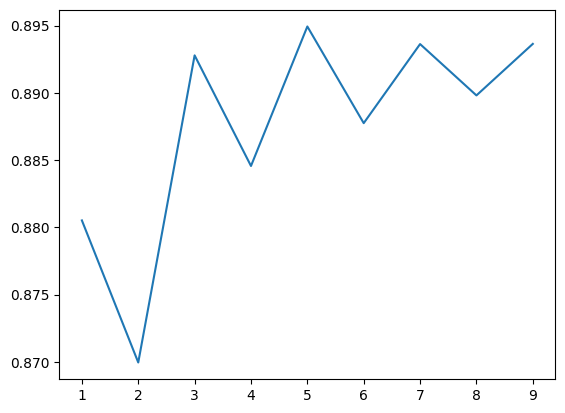

In [61]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 10), scores)
plt.show()